In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df_new = df.drop(columns=["User ID","Gender"])
df_new.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df_new.shape

(400, 3)

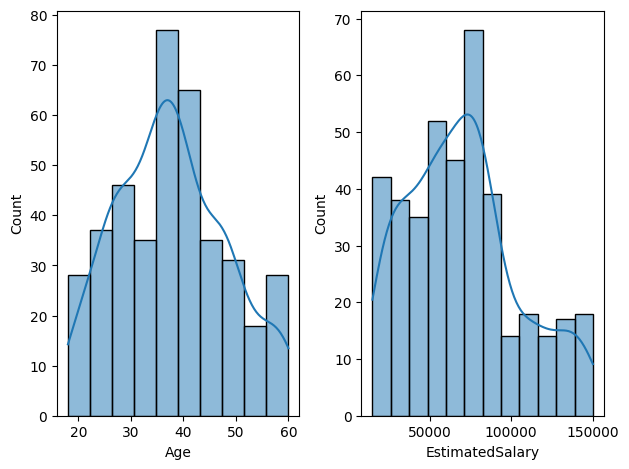

In [22]:
fig, axes = plt.subplots(1,2)

sns.histplot(data=df['Age'],kde=True,ax=axes[0])
sns.histplot(data=df['EstimatedSalary'],kde=True,ax=axes[1])

fig.tight_layout()

plt.show()

### Split data into train test

In [24]:
X_train,X_test, y_train, y_test = train_test_split(df_new.drop('Purchased', axis=1), df_new['Purchased'],test_size=0.2, random_state=2)
X_train.shape , X_test.shape

((320, 2), (80, 2))

### Standardization

In [25]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
scaler.mean_

array([3.7787500e+01, 6.9359375e+04])

In [27]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

### Convert X_train_scaled and X_test_scaled to data frame as those are numpy arrays

In [28]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [29]:
X_train_scaled

,Age,EstimatedSalary
0,0.889288,-0.659246
1,-0.172548,0.873927
2,-1.041324,-0.364405
3,0.985819,0.608570
4,-0.944793,0.579086
...,...,...
315,0.792758,1.404640
316,0.985819,-0.836150
317,-1.717038,-1.366863
318,-0.848263,0.313729


In [30]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


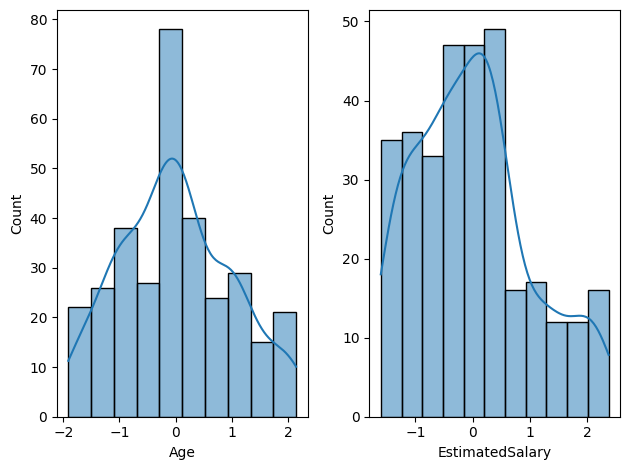

In [31]:
fig, axes = plt.subplots(1,2)

sns.histplot(data=X_train_scaled['Age'],kde=True,ax=axes[0])
sns.histplot(data=X_train_scaled['EstimatedSalary'],kde=True,ax=axes[1])

fig.tight_layout()

plt.show()

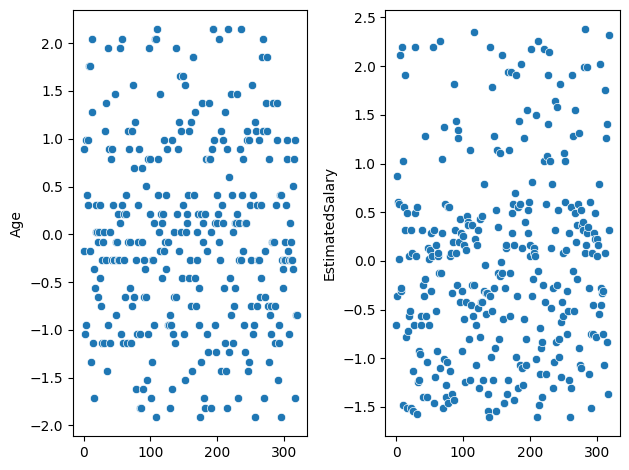

In [33]:
fig, axes = plt.subplots(1,2)

sns.scatterplot(data=X_train_scaled['Age'],ax=axes[0])
sns.scatterplot(data=X_train_scaled['EstimatedSalary'],ax=axes[1])

fig.tight_layout()

plt.show()

### Apply LogisticRegression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [71]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [72]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

### Check accuracy score

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test, y_pred_scaled))

Actual 0.8125
Scaled 0.8125


In [68]:
##nparr = np.array([[19,19000],[35,20000],[26,43000],[27,57000],[19,76000]])
nparr = np.array([1000,2000,3000,4000,5000])
sample_df = pd.DataFrame(nparr,columns=["flat"])
sample_df

,flat
0,1000
1,2000
2,3000
3,4000
4,5000


In [67]:
sc = StandardScaler()
new_arr=sc.fit_transform(sample_df)
new_arr

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])